<a href="https://colab.research.google.com/github/granja17/FootballPredict/blob/main/Projeto_IACH_parte_01_previs%C3%A3o_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib as mlp
import os
import warnings
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
nome_do_arquivo = '/content/Big 5 2010 - 2020 - att.csv'


df = pd.read_csv(nome_do_arquivo, sep=';')
filtro = (df['Movement'] == 'in')
df = df.loc[filtro]

pd.to_numeric(df.Fee)
pd.to_numeric(df.Age)
df['Is Loan'] = df['Is Loan'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Fee'].fillna(0, inplace=True)
df['Fee'] = df['Fee'].astype(int)
df['Season'] = pd.to_datetime(df['Season'], format='%Y')
df['Season'] = df['Season'].dt.strftime('%Y')
df.info('Age')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 36539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             11945 non-null  object
 1   Player           11945 non-null  object
 2   Age              11945 non-null  int64 
 3   Nationality      11945 non-null  object
 4   Position         11945 non-null  object
 5   Short Position   11945 non-null  object
 6   Market Value     11945 non-null  int64 
 7   Dealing Club     11945 non-null  object
 8   Dealing Country  11689 non-null  object
 9   Fee              11945 non-null  int64 
 10  Movement         11945 non-null  object
 11  Window           11945 non-null  object
 12  League           11945 non-null  object
 13  Season           11945 non-null  object
 14  Is Loan          11945 non-null  object
 15  Loan Status      296 non-null    object
dtypes: int64(3), object(13)
memory usage: 1.5+ MB


,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Season,Is Loan,Loan Status
0,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,2017,False,NaN
3,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,2018,False,NaN
5,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,2017,False,NaN
6,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,2017,False,NaN
8,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,2019,False,NaN


In [3]:
df.set_index('Season', drop=True, inplace=True)
df.head()

,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Is Loan,Loan Status
Season,,,,,,,,,,,,,,,
2017,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,False,NaN
2018,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,False,NaN
2017,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,False,NaN
2017,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,False,NaN
2019,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,False,NaN


In [4]:
gastos_por_liga = df.groupby(['League', 'Season'])['Fee'].sum().reset_index()
gastos_por_liga.set_index('Season', drop=True, inplace=True)


In [5]:
gastos_por_liga

,League,Fee
Season,,
2010,1 Bundesliga,213440000
2011,1 Bundesliga,218420000
2012,1 Bundesliga,291110000
2013,1 Bundesliga,305400000
2014,1 Bundesliga,368275000
2015,1 Bundesliga,475900000
2016,1 Bundesliga,707628000
2017,1 Bundesliga,723190000
2018,1 Bundesliga,568050000


# Realização do Modelo de Regressão Linear:
## Previsão de 2019 baseado em dados de 2010 a 2018

In [6]:
#'Season' para int
gastos_por_liga.index = gastos_por_liga.index.astype(int)


# dados até 2018
filtro = gastos_por_liga.index <= 2018
dados_ate_2018 = gastos_por_liga[filtro]


previsoes_df = pd.DataFrame(columns=['League', 'Fee'])

# lista única de ligas
ligas = dados_ate_2018['League'].unique()

# modelo de regressão linear para cada liga
for liga in ligas:
    dados_liga = dados_ate_2018[dados_ate_2018['League'] == liga]

    X = dados_liga.index.values.reshape(-1, 1)
    y = dados_liga['Fee'].values

    model = LinearRegression()
    model.fit(X, y)

    # gastos para 2019 - previsão
    previsao_2019 = model.predict([[2019]])[0]

    # somando os resultados ao DataFrame de previsões
    previsoes_df = previsoes_df.append({'League': liga, 'Fee': previsao_2019.astype(int)}, ignore_index=True)

# previsões
previsoes_df['Season'] = 2019
previsoes_df = previsoes_df.set_index('Season')
previsoes_df.info()
previsoes_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2019 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   League  5 non-null      object
 1   Fee     5 non-null      object
dtypes: object(2)
memory usage: 120.0+ bytes


,League,Fee
Season,,
2019,1 Bundesliga,758180833
2019,Laliga,994214249
2019,Ligue 1,714364444
2019,Premier League,2146971861
2019,Serie A,1196917659


# Criação de dados_completos que é o resultado dos dados reais de 2010 a 2018 concatenados a previsão 2019

In [7]:
# juntando os DataFrames
dados_completos = pd.concat([dados_ate_2018, previsoes_df])
dados_completos = dados_completos.reset_index()

# dados completos
dados_completos.sort_values(by='Season')

,Season,League,Fee
0,2010,1 Bundesliga,213440000
27,2010,Premier League,699110000
36,2010,Serie A,469626500
9,2010,Laliga,314230000
18,2010,Ligue 1,153915000
1,2011,1 Bundesliga,218420000
28,2011,Premier League,638573000
10,2011,Laliga,399615000
19,2011,Ligue 1,246940000
37,2011,Serie A,626721050


#Gráfico de dados até 2018 + previsão 2019

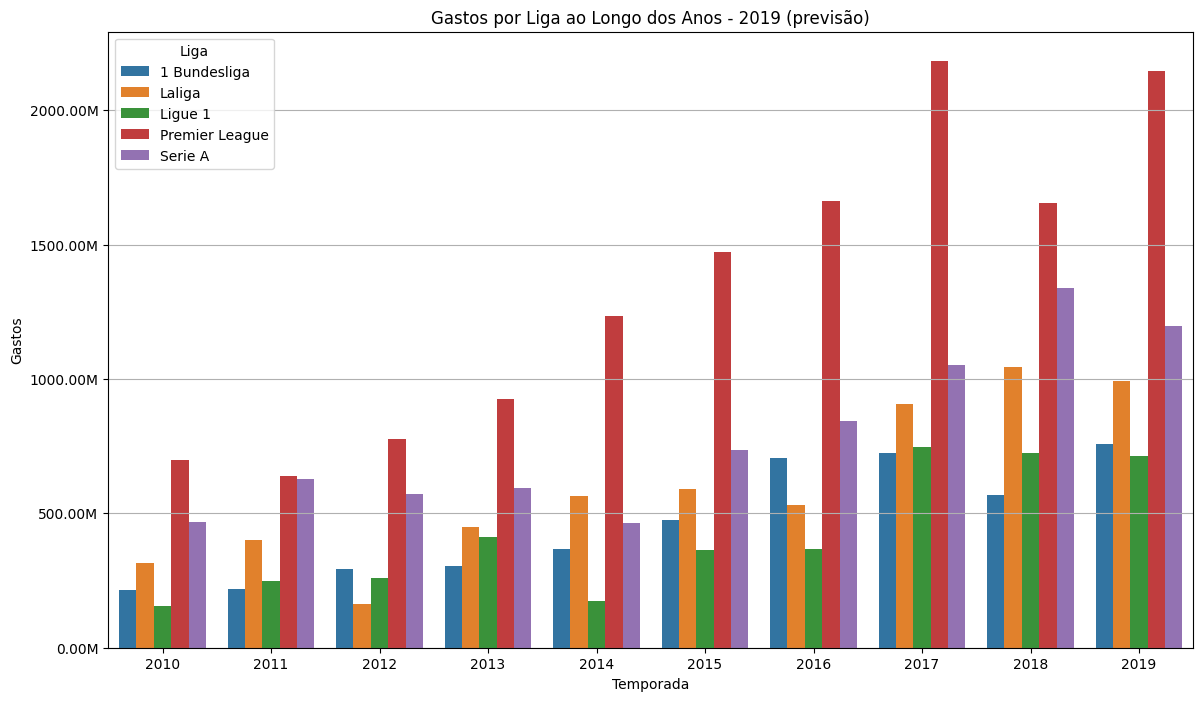

In [8]:
# gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Season', y='Fee', hue='League', data=dados_completos, ci=None)


plt.title('Gastos por Liga ao Longo dos Anos - 2019 (previsão)')
plt.xlabel('Temporada')
plt.ylabel('Gastos')
plt.legend(title='Liga')

# eixo y em milhões
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y')
plt.show()


# Gráfico Previsão 2019 x Realidade 2019

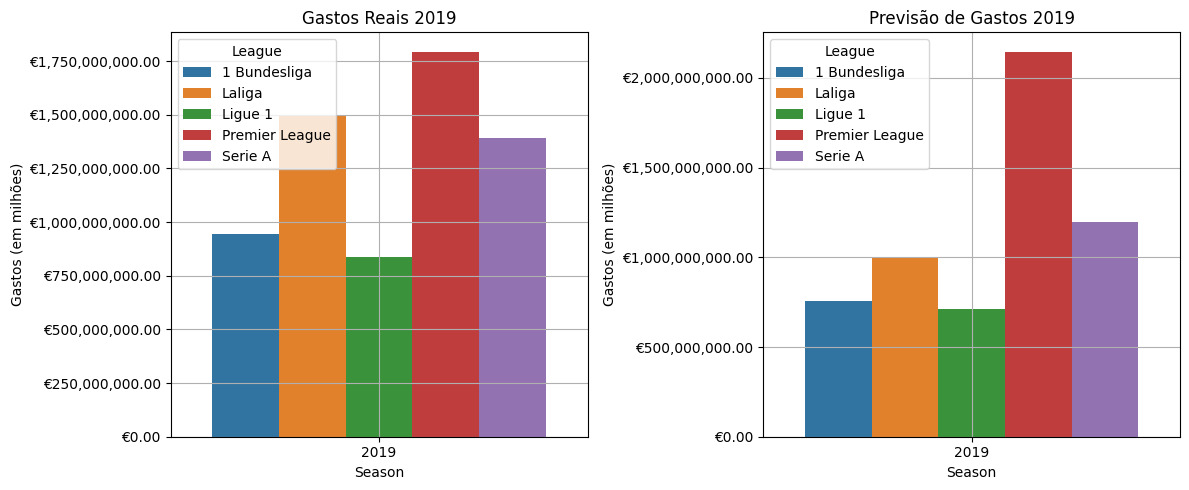

In [9]:
# 'dados_completos' incluindo apenas os dados de 2019
previsao_2019 = dados_completos[dados_completos['Season'] == 2019]

# 'gastos_por_liga' incluindo apenas os dados de 2019
gastos_2019 = gastos_por_liga.reset_index()
gastos_2019 = gastos_2019[gastos_2019['Season'] == 2019]

dados1 = gastos_2019
dados2 = previsao_2019

# DataFrames
df1 = pd.DataFrame(dados1)
df2 = pd.DataFrame(dados2)

# subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
palette = sns.color_palette('Set2')  # Você pode escolher outra paleta se preferir

# primeiro gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=gastos_2019, ax=axes[0])
axes[0].set_title('Gastos Reais 2019')
axes[0].set_ylabel('Gastos (em milhões)')
axes[0].yaxis.set_major_formatter('€{:,.2f}'.format)  # Correção na formatação
axes[0].grid(True)

# segundo gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=previsao_2019, ax=axes[1])
axes[1].set_title('Previsão de Gastos 2019')
axes[1].set_ylabel('Gastos (em milhões)')
axes[1].yaxis.set_major_formatter('€{:,.2f}'.format)  # Correção na formatação
axes[1].grid(True)

# Ajustando layout
plt.tight_layout()

# gráficos
plt.show()



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# MAE (Mean Absolute Error)
mae = mean_absolute_error(gastos_reais, previsao_gastos)
print(f'MAE: {mae:.2f}')

# MSE (Mean Squared Error)
mse = mean_squared_error(gastos_reais, previsao_gastos)
print(f'MSE: {mse:.2f}')

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


MAE: 271897355.20
MSE: 92812614959036576.00
RMSE: 304651628.85


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizando com o scaler
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

# Cálculo das métricas de erro
mae_norm = mean_absolute_error(gastos_reais_norm, previsao_gastos_norm)
mse_norm = mean_squared_error(gastos_reais_norm, previsao_gastos_norm)
rmse_norm = np.sqrt(mse_norm)

print(f'Normalized MAE: {mae_norm:.2f}')
print(f'Normalized MSE: {mse_norm:.2f}')
print(f'Normalized RMSE: {rmse_norm:.2f}')


Normalized MAE: 0.28
Normalized MSE: 0.10
Normalized RMSE: 0.32


# MAE, RMSE e MSE por Liga

In [12]:


gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # dados para a liga específica
    dados_liga_real = gastos_reais[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos[dados2['League'] == liga]

    # Calculando métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # Adicionando resultados ao DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League          MAE           MSE         RMSE
0    1 Bundesliga  184059167.0  3.387778e+16  184059167.0
1          Laliga  501635751.0  2.516384e+17  501635751.0
2         Ligue 1  124835556.0  1.558392e+16  124835556.0
3  Premier League  352856861.0  1.245080e+17  352856861.0
4         Serie A  196099441.0  3.845499e+16  196099441.0


In [13]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# Normalizando os valores de 'Fee'
scaler = MinMaxScaler()
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

# armazenar os resultados
resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

# lista única de ligas
ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # liga específica
    dados_liga_real = gastos_reais_norm[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos_norm[dados2['League'] == liga]

    # métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # Adicionando resultados ao DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League       MAE       MSE      RMSE
0    1 Bundesliga  0.192749  0.037152  0.192749
1          Laliga  0.525320  0.275961  0.525320
2         Ligue 1  0.130729  0.017090  0.130729
3  Premier League  0.369517  0.136542  0.369517
4         Serie A  0.205358  0.042172  0.205358


#Train 60, test 40

In [14]:
gastos_por_liga=gastos_por_liga.reset_index()

In [15]:
# dados de treino (até 2018) e teste (2019) para cada liga
leagues = gastos_por_liga['League'].unique()

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2018) e teste (2019)
    train_data = league_data[league_data['Season'] <= 2018]
    test_data = league_data[league_data['Season'] == 2019]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # conjuntos de treino e teste
    # Divisão 40/60
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)

    # resultados para a Liga
    results = pd.DataFrame({'Real': y_test, 'Previsto': predictions, 'Diferença': y_test - predictions})
    print(f'Resultados para a Liga {league}:')
    print(results)
    print("\n")


Resultados para a Liga 1 Bundesliga:
        Real   Previsto  Diferença
9  942240000  724146741  218093259


Resultados para a Liga Laliga:
          Real    Previsto  Diferença
20  1495850000  1081970431  413879569


Resultados para a Liga Ligue 1:
         Real   Previsto  Diferença
31  839200000  681011206  158188794


Resultados para a Liga Premier League:
          Real    Previsto  Diferença
42  1794115000  1954501758 -160386758


Resultados para a Liga Serie A:
          Real    Previsto  Diferença
53  1393017100  1334219560   58797540




#Train 80, test 20 - com MSE, MAE e RMSE

In [16]:
# métricas por liga
mse_list = []
mae_list = []
rmse_list = []

# resultados por liga
results_list = []

# dados de treino (até 2018) e teste (2019) para cada liga
leagues = gastos_por_liga['League'].unique()

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2018) e teste (2019)
    train_data = league_data[league_data['Season'] <= 2018]
    test_data = league_data[league_data['Season'] == 2019]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # conjuntos de treino e teste
    # TT 80/20
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # o modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)  # Convertendo para inteiros

    # Calcular métricas
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Adicionar métricas a lista
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

    # Adicionar resultados ao DataFrame results_list
    results = pd.DataFrame({'Real': y_test.values, 'Previsto': predictions, 'Diferenca': y_test.values - predictions})
    results_list.append(results)

    # resultados para a Liga
    print(f'Resultados para a Liga {league}:')
    print(results)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}\n')

# resultados para todas as ligas
all_results = pd.concat(results_list)

# métricas médias para todas as ligas
print("Médias das Métricas para Todas as Ligas:")
print(f'Média MSE: {np.mean(mse_list)}')
print(f'Média MAE: {np.mean(mae_list)}')
print(f'Média RMSE: {np.mean(rmse_list)}')

# DataFrame com todas as diferenças entre Real e Previsto
print("\nResultados com Diferenças:")
all_results["League"] = "1 Bundesliga", "Laliga", "Ligue 1", "Premier League", "Serie A"
all_results


Resultados para a Liga 1 Bundesliga:
        Real   Previsto  Diferenca
0  942240000  706873761  235366239
MSE: 5.539726646100512e+16
MAE: 235366239.0
RMSE: 235366239.0

Resultados para a Liga Laliga:
         Real   Previsto  Diferenca
0  1495850000  973356476  522493524
MSE: 2.7299948262193856e+17
MAE: 522493524.0
RMSE: 522493524.0

Resultados para a Liga Ligue 1:
        Real   Previsto  Diferenca
0  839200000  644250119  194949881
MSE: 3.800545610191416e+16
MAE: 194949881.0
RMSE: 194949881.0

Resultados para a Liga Premier League:
         Real    Previsto  Diferenca
0  1794115000  1934018285 -139903285
MSE: 1.9572929153791224e+16
MAE: 139903285.0
RMSE: 139903285.0

Resultados para a Liga Serie A:
         Real    Previsto  Diferenca
0  1393017100  1212052357  180964743
MSE: 3.274823820905605e+16
MAE: 180964743.0
RMSE: 180964743.0

Médias das Métricas para Todas as Ligas:
Média MSE: 8.374467450954102e+16
Média MAE: 254735534.4
Média RMSE: 254735534.4

Resultados com Diferenças:


,Real,Previsto,Diferenca,League
0,942240000,706873761,235366239,1 Bundesliga
0,1495850000,973356476,522493524,Laliga
0,839200000,644250119,194949881,Ligue 1
0,1794115000,1934018285,-139903285,Premier League
0,1393017100,1212052357,180964743,Serie A


# TVT 40-30-30

In [17]:
dados_completos

,Season,League,Fee
0,2010,1 Bundesliga,213440000
1,2011,1 Bundesliga,218420000
2,2012,1 Bundesliga,291110000
3,2013,1 Bundesliga,305400000
4,2014,1 Bundesliga,368275000
5,2015,1 Bundesliga,475900000
6,2016,1 Bundesliga,707628000
7,2017,1 Bundesliga,723190000
8,2018,1 Bundesliga,568050000
9,2010,Laliga,314230000


In [18]:
# dados por liga
leagues = dados_completos['League'].unique()

# listas para armazenar os resultados
val_results_list = []
test_results_list = []

for league in leagues:
    # dados para a liga específica
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados em treino (até 2018), validação e teste (2019)
    train_data = league_data[league_data['Season'] <= 2018]
    test_data = league_data[league_data['Season'] == 2019]

    # treino e validação
    train_data, val_data = train_test_split(train_data, test_size=0.3, train_size=0.4, random_state=42)

    # features e alvo para treino
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    # features e alvo para validação
    X_val = val_data[['Season']]
    y_val = val_data['Fee']

    # features e alvo para teste
    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de validação
    predictions_val = model.predict(X_val).astype(int)

    # Adicionar resultados para o ano de 2019 na validação
    val_results = pd.DataFrame({'Real': y_val, 'Previsto': predictions_val, 'League': val_data['League'], 'Season': val_data['Season']})
    val_results_2019 = val_results[val_results['Season'] == 2019]
    val_results_list.append(val_results_2019)

    # previsões nos dados de teste
    predictions_test = model.predict(X_test).astype(int)

    # Adicionar resultados para o ano de 2019 no teste
    test_results = pd.DataFrame({'Real': y_test, 'Previsto': predictions_test, 'League': test_data['League'], 'Season': test_data['Season']})
    test_results_2019 = test_results[test_results['Season'] == 2019]
    test_results_list.append(test_results_2019)

# Consolidar os resultados para validação e teste
val_results_final = pd.concat(val_results_list)
test_results_final = pd.concat(test_results_list)

# Converter as colunas de previsões e valores reais para inteiros
val_results_final['Previsto'] = val_results_final['Previsto'].astype(int)
test_results_final['Previsto'] = test_results_final['Previsto'].astype(int)
val_results_final['Real'] = val_results_final['Real'].astype(int)
test_results_final['Real'] = test_results_final['Real'].astype(int)

print("\nValores por Liga na Teste (2019):")
final = (test_results_final.groupby(['League']).mean())
final['Real'] = final["Real"].astype(int)
final['Previsto'] = final["Previsto"].astype(int)
final['Season'] = final["Season"].astype(int)
final['Diferença'] = final['Real'] - final["Previsto"]
final



Valores por Liga na Teste (2019):


,Real,Previsto,Season,Diferença
League,,,,
1 Bundesliga,942240000,611109038,2019,331130962
Laliga,1495850000,1095536153,2019,400313847
Ligue 1,839200000,793547019,2019,45652981
Premier League,1794115000,1754204173,2019,39910827
Serie A,1393017100,1433009086,2019,-39991986
